### Práctica 25 RNA LSTM

A continuación se presenta un programa en Python que utiliza una Red Neuronal Artificial con capas LSTM para resolver un problema Many to One, donde se predice un único valor de salida (temperatura y humedad) a partir de una secuencia temporal de datos anteriores.

Objetivo del modelo:
Predecir una única salida a partir de una ventana de tiempo pasada (Many to One).
Entrada: valores de temperatura, humedad y hora de los últimos n pasos.
Salida: valores de temperatura y humedad en el siguiente paso temporal.

Explicación de las capas:

🔹 Entrada a la red (X):
Cada muestra de entrada es un array de tamaño (10, 3): una secuencia de 10 pasos (ventana de tiempo) con 3 variables: temperatura, humedad y hora.

🔹 Capa LSTM:

model.add(LSTM(units=50, input_shape=(X.shape[1], X.shape[2])))
Esta capa procesa la secuencia temporal.

Aprende dependencias temporales entre los datos pasados y la salida futura.

Devuelve una única salida porque return_sequences=False (valor por defecto), lo que es típico en Many-to-One.

🔹 Capa Dense:

model.add(Dense(units=3)) Capa de salida completamente conectada.

Toma la salida de la LSTM (un vector de 50 dimensiones) y la transforma en un vector de 2 elementos: temperatura y humedad.

Al final del código se genera uan secuencia sintetica para hacer una predicción. 
Le entregamos el valor de una determinada hora y el programa genera una tupla de 10 valores de temperatura y humedad y añade el valor de hora generando de forma descendente a partir del valor dado.

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2810 - val_loss: 0.0672
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0663 - val_loss: 0.0416
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - val_loss: 0.0210
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - val_loss: 0.0069
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - val_loss: 0.0059
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - val_l

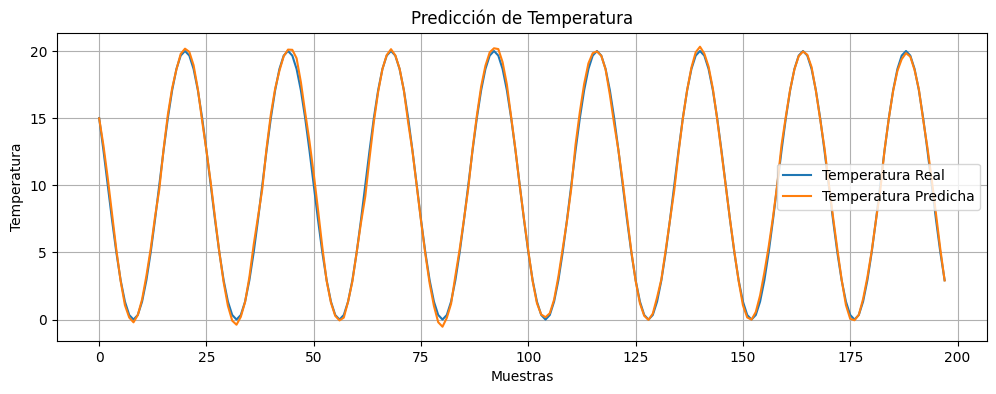

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Predicción para las : 15 horas
Temperatura: 2.94 °C
Humedad: 78.22 %


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


# 1. Generamos datos sintéticos
def generar_datos_sinteticos(n_samples=1000):
    hours = np.arange(n_samples) % 24  # Hora del día (0 a 23 repetido)
    temperature = 10 + 10 * np.sin(2 * np.pi * hours / 24)  # Simulación cíclica de temperatura
    humidity = 80 - 0.5 * temperature + np.random.normal(0, 2, n_samples)  # Humedad inversa + ruido
    data = np.column_stack((temperature, humidity, hours))  # Matriz [temp, hum, hora]
    return data

# 2. Crear datos organizados por ventanas deslizantes
def crear_datos(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])     # Ventana de entrada
        y.append(data[i+window_size])       # Siguiente tupla como salida
    return np.array(X), np.array(y)

# Generar 1000 muestras sintéticas
data = generar_datos_sinteticos(1000)

# Escalado entre 0 y 1 para mejorar entrenamiento
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Crear ventanas de tamaño 10
ventana = 10
X_full, y_full = crear_datos(data_scaled, ventana)

# Seleccionar solo temperatura y humedad (columnas 0 y 1) como salida
X = X_full
y = y_full[:, :2]  # Solo temperatura y humedad

# Dividir conjunto en entrenamiento (80%) y test (20%)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 3. Construcción del modelo LSTM Many-to-One
ventana_de_entrada=X.shape[1]
caracteristicas_por_tupla=X.shape[2]
model = Sequential()
model.add(Input(shape=(ventana_de_entrada, caracteristicas_por_tupla)))
# Añadir capa LSTM
model.add(LSTM(units=50))


# Capa densa de salida con 2 neuronas: temperatura y humedad
model.add(Dense(units=2))
# Compilar modelo para regresión
model.compile(optimizer='adam', loss='mse')

# 4. Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 5. Evaluación con el conjunto de test
loss = model.evaluate(X_test, y_test)
print(f"Loss en test: {loss:.4f}")

# 6. Predicciones con el conjunto de test
y_pred = model.predict(X_test)

# Función auxiliar para desescalar [temp, hum] añadiendo hora ficticia para que el scaler funcione
def desescalar_temperatura_humedad(escalado):
    extendido = np.concatenate([escalado, np.zeros((escalado.shape[0], 1))], axis=1)  # Añadir columna "hora" = 0
    desescalado = scaler.inverse_transform(extendido)
    return desescalado[:, :2]  # Devolver solo temperatura y humedad

# Invertir escalado para interpretar resultados reales
y_test_inv = desescalar_temperatura_humedad(y_test)
y_pred_inv = desescalar_temperatura_humedad(y_pred)

# Visualizar predicciones vs valores reales (temperatura)
plt.figure(figsize=(12, 4))
plt.plot(y_test_inv[:, 0], label='Temperatura Real')
plt.plot(y_pred_inv[:, 0], label='Temperatura Predicha')
plt.title("Predicción de Temperatura")
plt.xlabel("Muestras")
plt.ylabel("Temperatura")
plt.legend()
plt.grid(True)
plt.show()

# 7. Predicción para una hora específica
# --------------------------------------
hora_deseada = 15  # Cambiar a cualquier hora del día (0 a 23)

# Construimos la ventana de entrada con datos simulados previos
ventana_prediccion = []
for i in range(hora_deseada - ventana, hora_deseada):
    h = i % 24  # Aseguramos que las horas se mantengan en ciclo 0-23
    temp = 10 + 10 * np.sin(2 * np.pi * h / 24)  # Simulamos temperatura
    hum = 80 - 0.5 * temp                        # Calculamos humedad
    ventana_prediccion.append([temp, hum, h])   # Añadir a la secuencia

ventana_prediccion = np.array(ventana_prediccion)
ventana_prediccion_scaled = scaler.transform(ventana_prediccion)  # Escalar
entrada = np.expand_dims(ventana_prediccion_scaled, axis=0)  # Añadir dimensión para el modelo

# Hacer predicción
prediccion_scaled = model.predict(entrada)

# Desescalar el resultado
prediccion_ext = np.concatenate([prediccion_scaled, np.zeros((1, 1))], axis=1)  # Añadir columna de hora ficticia
prediccion = scaler.inverse_transform(prediccion_ext)[:, :2]

# Mostrar resultados
print(f"\nPredicción para las : {hora_deseada} horas")
print(f"Temperatura: {prediccion[0][0]:.2f} °C")
print(f"Humedad: {prediccion[0][1]:.2f} %")
